In [10]:
import yaml
 
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

In [11]:
import pandas as pd

df = pd.read_csv(config['input_data']['file'])
df

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.
...,...,...,...,...,...,...,...,...
34928,Merlot,Red,mac and cheese,Cheese,Greek,5,Excellent,Idealized perfect pairing example for contrast.
34929,Sauternes,Dessert,grilled ribeye,Red Meat,Spanish,5,Excellent,Idealized perfect pairing example for contrast.
34930,Sauternes,Dessert,fondue,Cheese,Mexican,1,Terrible,Deliberately bad pairing example for contrast.
34931,Zinfandel,Red,beef stew,Red Meat,Mexican,5,Excellent,Idealized perfect pairing example for contrast.


In [12]:
df["food_item"].unique()

array(['smoked sausage', 'charcuterie board', 'lemon tart', 'roast lamb',
       'duck à l’orange', 'citrus salad', 'oysters', 'cheese platter',
       'bacon burger', 'chicken curry', 'vegetable curry',
       'alfredo pasta', 'Thai curry', 'roast chicken with herbs',
       'shrimp scampi', 'stir-fried tofu', 'cheesecake', 'beef stew',
       'grilled burger', 'Indian vindaloo', 'mushroom risotto',
       'grilled salmon', 'mac and cheese', 'sorbet', 'grilled ribeye',
       'cream of mushroom soup', 'olives and cheese', 'Sichuan noodles',
       'bbq brisket', 'fondue', 'bbq ribs', 'carbonara',
       'pork tenderloin', 'chocolate mousse', 'mixed nuts', 'fish tacos',
       'caprese salad', 'gazpacho'], dtype=object)

In [13]:
df["food_item"].value_counts()

food_item
fondue                      2246
mac and cheese              2227
grilled ribeye              2223
cheese platter              2218
beef stew                   2215
caprese salad               2071
bbq brisket                 1856
roast lamb                  1855
gazpacho                    1770
citrus salad                1756
carbonara                    679
fish tacos                   612
shrimp scampi                612
oysters                      612
grilled salmon               612
stir-fried tofu              595
bacon burger                 595
vegetable curry              595
mushroom risotto             595
pork tenderloin              544
cream of mushroom soup       544
alfredo pasta                543
bbq ribs                     510
grilled burger               510
smoked sausage               510
charcuterie board            510
mixed nuts                   510
olives and cheese            510
sorbet                       510
cheesecake                   509


In [14]:
df["food_category"].unique()

array(['Smoky BBQ', 'Salty Snack', 'Dessert', 'Red Meat', 'Poultry',
       'Acidic', 'Seafood', 'Cheese', 'Pork', 'Vegetarian', 'Creamy',
       'Spicy'], dtype=object)

In [15]:
df["food_category"].value_counts()

food_category
Red Meat       8149
Cheese         6691
Acidic         5597
Seafood        2448
Dessert        2020
Vegetarian     1785
Smoky BBQ      1530
Salty Snack    1530
Pork           1507
Creamy         1398
Poultry        1292
Spicy           986
Name: count, dtype: int64

In [16]:
df["cuisine"].unique()

array(['Spanish', 'French', 'Mexican', 'Vietnamese', 'Argentinian',
       'Moroccan', 'Italian', 'American BBQ', 'German', 'Thai',
       'Middle Eastern', 'Japanese', 'Chinese (Sichuan)', 'Ethiopian',
       'Greek', 'Korean', 'Indian'], dtype=object)

In [17]:
df["cuisine"].value_counts()

cuisine
Mexican              2089
Middle Eastern       2075
Thai                 2071
Chinese (Sichuan)    2068
Moroccan             2068
Vietnamese           2065
Indian               2062
Ethiopian            2059
Korean               2058
American BBQ         2049
Japanese             2047
Argentinian          2045
Spanish              2044
Italian              2042
Greek                2038
French               2031
German               2022
Name: count, dtype: int64

In [18]:
# Count rows per combination - food
result_cuisine = (
    df.groupby(['cuisine', 'pairing_quality'])
      .size()
      .reset_index(name='count')
      .sort_values(['cuisine', 'pairing_quality'])
)

print(result_cuisine)

         cuisine  pairing_quality  count
0   American BBQ                1    404
1   American BBQ                2    364
2   American BBQ                3    478
3   American BBQ                4    381
4   American BBQ                5    422
..           ...              ...    ...
80    Vietnamese                1    419
81    Vietnamese                2    365
82    Vietnamese                3    476
83    Vietnamese                4    381
84    Vietnamese                5    424

[85 rows x 3 columns]


In [19]:
# Pivot for plotting
pivot = result_cuisine.pivot_table(
    index='cuisine',
    columns='pairing_quality',
    values='count',
    fill_value=0
).sort_index()

pivot = pivot.astype(int)

print(pivot)

pairing_quality      1    2    3    4    5
cuisine                                   
American BBQ       404  364  478  381  422
Argentinian        405  364  478  379  419
Chinese (Sichuan)  416  365  478  380  429
Ethiopian          417  365  479  380  418
French             414  360  472  378  407
German             408  362  471  374  407
Greek              410  361  475  376  416
Indian             409  365  478  381  429
Italian            416  361  474  377  414
Japanese           411  365  479  379  413
Korean             409  363  479  381  426
Mexican            424  364  479  381  441
Middle Eastern     429  363  477  380  426
Moroccan           415  364  479  381  429
Spanish            411  363  478  379  413
Thai               417  365  478  381  430
Vietnamese         419  365  476  381  424


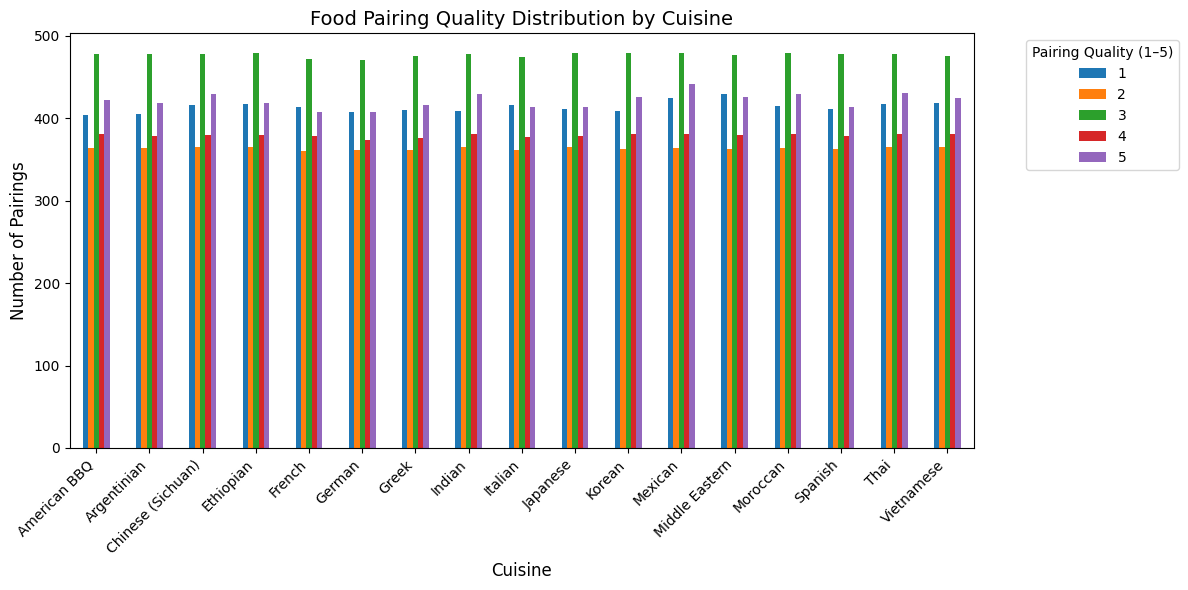

In [20]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
pivot.plot(kind='bar', figsize=(12, 6))

plt.title('Food Pairing Quality Distribution by Cuisine', fontsize=14)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Number of Pairings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pairing Quality (1–5)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

pairing_quality    avg_rating  std_rating  versatility_index
cuisine                                                     
American BBQ         3.025866    1.405495           1.620371
Indian               3.027158    1.409487           1.617671
Korean               3.025267    1.408479           1.616788
Argentinian          3.021027    1.405211           1.615816
Moroccan             3.021760    1.411479           1.610281
Chinese (Sichuan)    3.019826    1.412193           1.607633
Thai                 3.020280    1.412702           1.607578
Mexican              3.024414    1.418566           1.605848
Greek                3.013248    1.408066           1.605182
Spanish              3.009785    1.405504           1.604280
Japanese             3.008793    1.404828           1.603965
Vietnamese           3.012591    1.412101           1.600489
Ethiopian            3.008256    1.408511           1.599745
German               3.004946    1.405787           1.599159
Italian              3.0

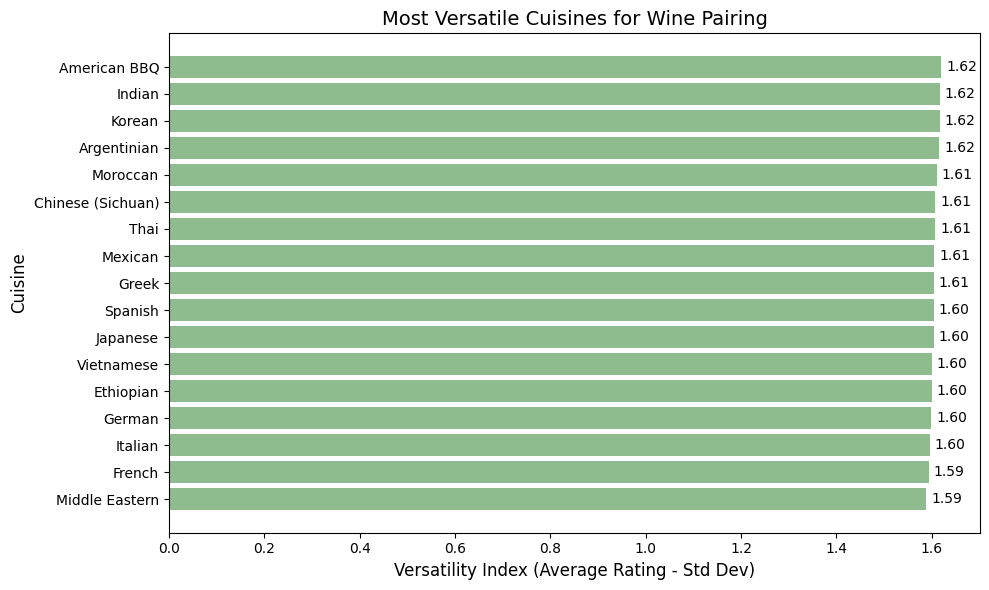

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Weighted average rating (mean rating per cuisine)
pivot['avg_rating'] = (
    pivot[1]*1 + pivot[2]*2 + pivot[3]*3 + pivot[4]*4 + pivot[5]*5
) / pivot[[1,2,3,4,5]].sum(axis=1)

# --- Weighted standard deviation function ---
def weighted_std(values, weights):
    """Compute weighted standard deviation."""
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    return np.sqrt(variance)

# Compute weighted std for each cuisine
ratings = np.array([1, 2, 3, 4, 5])
pivot['std_rating'] = pivot.apply(
    lambda row: weighted_std(ratings, row[[1,2,3,4,5]].values),
    axis=1
)

# --- Versatility Index (higher = more consistently good) ---
pivot['versatility_index'] = pivot['avg_rating'] - pivot['std_rating']

# --- Sort by versatility ---
pivot_sorted = pivot.sort_values(by='versatility_index', ascending=False)

# --- Display results ---
print(pivot_sorted[['avg_rating', 'std_rating', 'versatility_index']])

plt.figure(figsize=(10, 6))
plt.barh(pivot_sorted.index, pivot_sorted['versatility_index'], color='darkseagreen')
plt.gca().invert_yaxis()
plt.title('Most Versatile Cuisines for Wine Pairing', fontsize=14)
plt.xlabel('Versatility Index (Average Rating - Std Dev)', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)

for i, v in enumerate(pivot_sorted['versatility_index']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [22]:
# Combine wine type and category for distinctness (optional)
df['wine_label'] = df['wine_type'] + ' (' + df['wine_category'] + ')'

# Filter only the 5-star pairings
five_star_df = df[df['pairing_quality'] == 5]

# Count distinct wines per cuisine
distinct_wines_per_cuisine = (
    five_star_df.groupby('cuisine')['wine_label']
    .nunique()
    .sort_values(ascending=False)
)

print(distinct_wines_per_cuisine)

cuisine
American BBQ         29
Argentinian          29
Chinese (Sichuan)    29
Ethiopian            29
French               29
German               29
Greek                29
Indian               29
Italian              29
Japanese             29
Korean               29
Mexican              29
Middle Eastern       29
Moroccan             29
Spanish              29
Thai                 29
Vietnamese           29
Name: wine_label, dtype: int64


In [23]:
# Calculate weighted average rating per cuisine
pivot['avg_rating'] = (
    (pivot[1]*1 + pivot[2]*2 + pivot[3]*3 + pivot[4]*4 + pivot[5]*5)
    / pivot[[1, 2, 3, 4, 5]].sum(axis=1)
)

# Round average rating to 2 decimals for readability
pivot['avg_rating'] = pivot['avg_rating'].round(3)

# Sort wines by highest average rating
pivot_sorted = pivot.sort_values(by='avg_rating', ascending=False)

# Display the top 10 cuisines with the highest average rating
print(pivot_sorted[['avg_rating']].head(29))

pairing_quality    avg_rating
cuisine                      
Indian                  3.027
American BBQ            3.026
Korean                  3.025
Mexican                 3.024
Moroccan                3.022
Argentinian             3.021
Thai                    3.020
Chinese (Sichuan)       3.020
Greek                   3.013
Vietnamese              3.013
Spanish                 3.010
Japanese                3.009
Ethiopian               3.008
Italian                 3.006
German                  3.005
Middle Eastern          3.005
French                  3.002


In [25]:
# Total of all average ratings across cuisine
total_avg_cuisine = pivot_sorted['avg_rating'].sum()

# Calculate percentage of total average rating for each white wine
pivot_sorted['pct_of_total_avg'] = (pivot_sorted['avg_rating'] / total_avg_cuisine) * 100

# Round for readability
pivot_sorted['pct_of_total_avg'] = pivot_sorted['pct_of_total_avg'].round(3)

# Sort by percentage (highest to lowest)
pivot_cuisine_sorted = pivot_sorted.sort_values(by='pct_of_total_avg', ascending=False)

# Display the top cuisines
print(pivot_cuisine_sorted[['avg_rating', 'pct_of_total_avg']])

pairing_quality    avg_rating  pct_of_total_avg
cuisine                                        
Indian                  3.027             5.906
American BBQ            3.026             5.904
Korean                  3.025             5.902
Mexican                 3.024             5.900
Moroccan                3.022             5.896
Argentinian             3.021             5.894
Thai                    3.020             5.892
Chinese (Sichuan)       3.020             5.892
Greek                   3.013             5.878
Vietnamese              3.013             5.878
Spanish                 3.010             5.872
Japanese                3.009             5.871
Ethiopian               3.008             5.869
Italian                 3.006             5.865
German                  3.005             5.863
Middle Eastern          3.005             5.863
French                  3.002             5.857


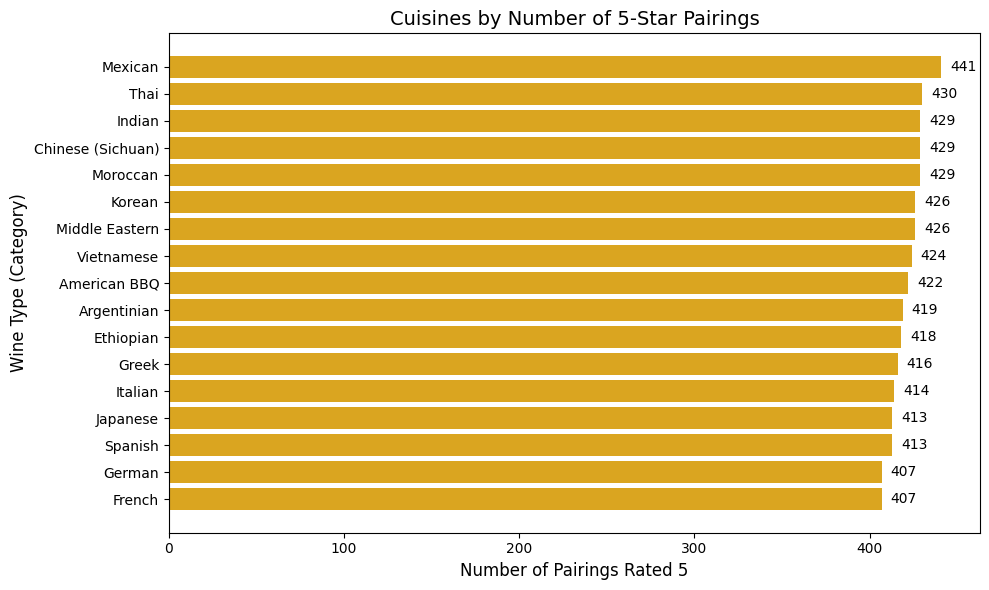

In [28]:
# --- Sort by count of pairing_quality = 5 ---
cuisine_5stars = pivot_sorted.sort_values(by=5, ascending=False)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.barh(cuisine_5stars.index, cuisine_5stars[5], color='goldenrod')
plt.gca().invert_yaxis()  # Highest at top
plt.title('Cuisines by Number of 5-Star Pairings', fontsize=14)
plt.xlabel('Number of Pairings Rated 5', fontsize=12)
plt.ylabel('Wine Type (Category)', fontsize=12)

# Add labels to bars
for i, v in enumerate(cuisine_5stars[5]):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
# Sum all counts where pairing_quality = 5
total_cuisine_5 = pivot_sorted[5].sum()

# Calculate each wine’s percentage of total 5-star pairings
pivot_sorted['pct_of_total_5'] = (pivot_sorted[5] / total_cuisine_5) * 100

# Round for readability
pivot_sorted['pct_of_total_5'] = pivot_sorted['pct_of_total_5'].round(3)

# Sort from highest to lowest percentage
pivot_cuisine_sorted = pivot_sorted.sort_values(by='pct_of_total_5', ascending=False)

pivot_cuisine_sorted

pairing_quality,1,2,3,4,5,avg_rating,std_rating,versatility_index,pct_of_total_avg,pct_of_total_5,pct_of_total_1
cuisine,,,,,,,,,,,
Mexican,424,364,479,381,441,3.024,1.418566,1.605848,5.900,6.157,6.028
Thai,417,365,478,381,430,3.020,1.412702,1.607578,5.892,6.003,5.928
Indian,409,365,478,381,429,3.027,1.409487,1.617671,5.906,5.989,5.815
Chinese (Sichuan),416,365,478,380,429,3.020,1.412193,1.607633,5.892,5.989,5.914
Moroccan,415,364,479,381,429,3.022,1.411479,1.610281,5.896,5.989,5.900
Korean,409,363,479,381,426,3.025,1.408479,1.616788,5.902,5.947,5.815
Middle Eastern,429,363,477,380,426,3.005,1.416417,1.588884,5.863,5.947,6.099
Vietnamese,419,365,476,381,424,3.013,1.412101,1.600489,5.878,5.919,5.957
American BBQ,404,364,478,381,422,3.026,1.405495,1.620371,5.904,5.891,5.744


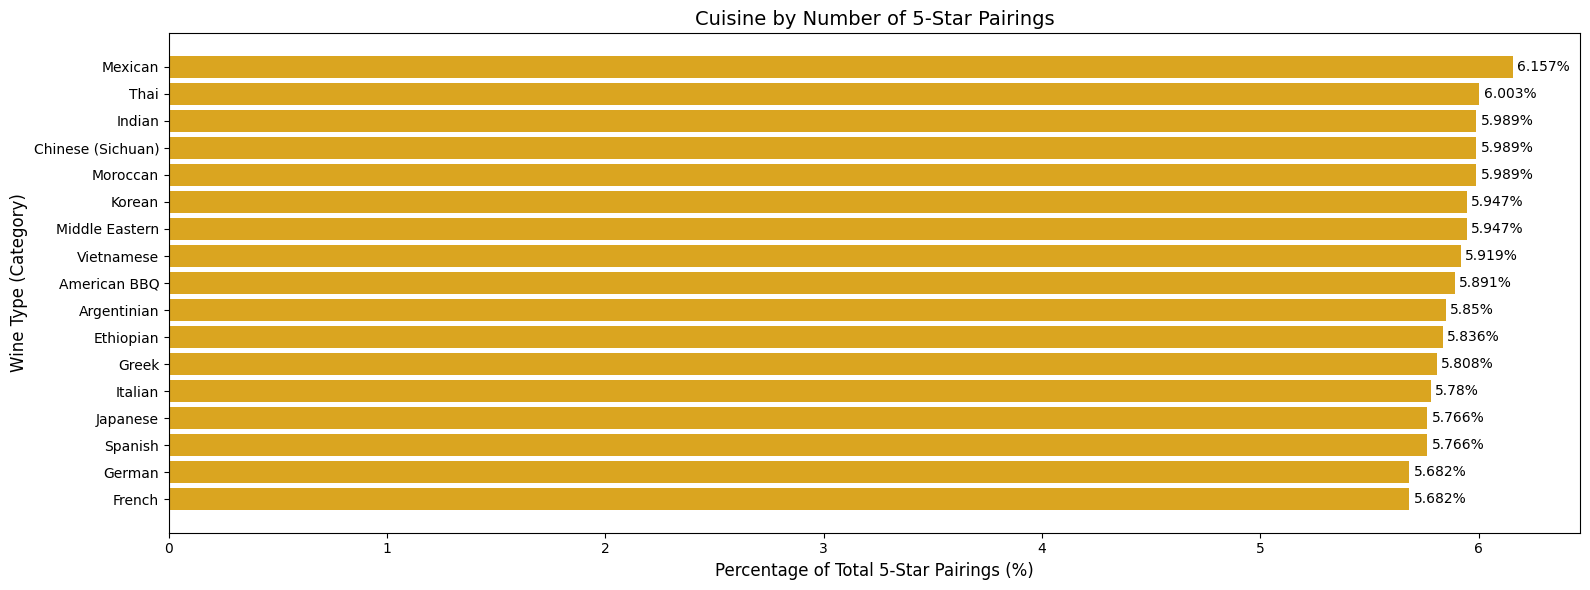

In [35]:
# Sort from highest to lowest percentage
pivot_cuisine_sorted = pivot_sorted.sort_values(by='pct_of_total_5', ascending=False)

# --- Visualization ---
plt.figure(figsize=(16, 6))
plt.barh(pivot_cuisine_sorted.index, pivot_cuisine_sorted['pct_of_total_5'], color='goldenrod')
plt.gca().invert_yaxis()  # Highest at top
plt.title('Cuisine by Number of 5-Star Pairings', fontsize=14)
plt.xlabel('Percentage of Total 5-Star Pairings (%)', fontsize=12)
plt.ylabel('Wine Type (Category)', fontsize=12)

# Add labels to bars
for i, v in enumerate(pivot_cuisine_sorted['pct_of_total_5']):
    plt.text(v + 0.02, i, f"{v}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

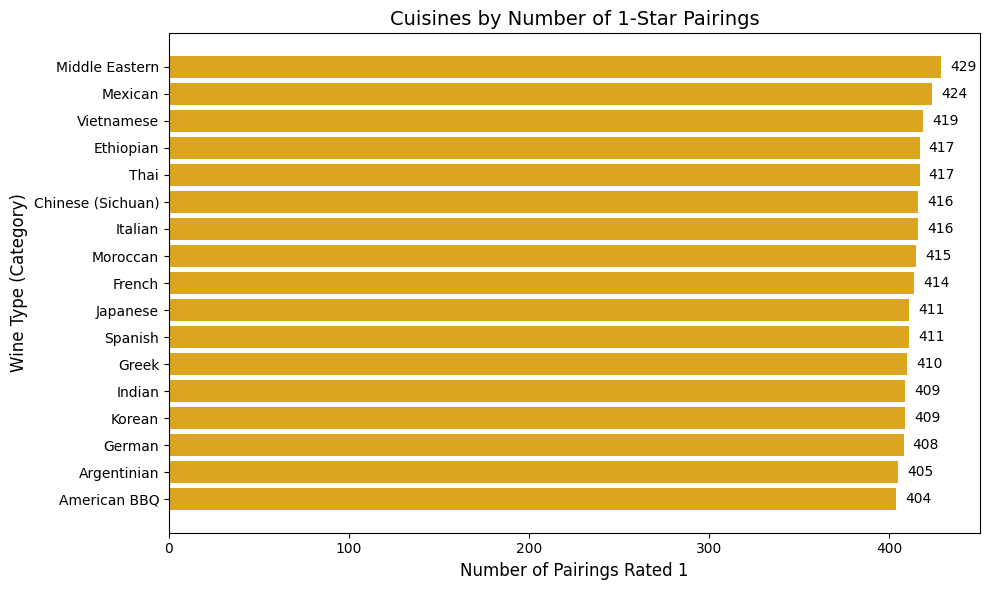

In [37]:
# --- Sort by count of pairing_quality = 1 ---
cuisine_1stars = pivot_sorted.sort_values(by=1, ascending=False)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.barh(cuisine_1stars.index, cuisine_1stars[1], color='goldenrod')
plt.gca().invert_yaxis()  # Highest at top
plt.title('Cuisines by Number of 1-Star Pairings', fontsize=14)
plt.xlabel('Number of Pairings Rated 1', fontsize=12)
plt.ylabel('Wine Type (Category)', fontsize=12)

# Add labels to bars
for i, v in enumerate(cuisine_1stars[1]):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
# Sum all counts where pairing_quality = 1
total_cuisine_1 = pivot_sorted[1].sum()

# Calculate each wine’s percentage of total 1-star pairings
pivot_sorted['pct_of_total_1'] = (pivot_sorted[1] / total_cuisine_1) * 100

# Round for readability
pivot_sorted['pct_of_total_1'] = pivot_sorted['pct_of_total_1'].round(3)

# Sort from highest to lowest percentage
pivot_cuisine_sorted = pivot_sorted.sort_values(by='pct_of_total_1', ascending=False)

pivot_cuisine_sorted

pairing_quality,1,2,3,4,5,avg_rating,std_rating,versatility_index,pct_of_total_avg,pct_of_total_5,pct_of_total_1
cuisine,,,,,,,,,,,
Middle Eastern,429,363,477,380,426,3.005,1.416417,1.588884,5.863,5.947,6.099
Mexican,424,364,479,381,441,3.024,1.418566,1.605848,5.900,6.157,6.028
Vietnamese,419,365,476,381,424,3.013,1.412101,1.600489,5.878,5.919,5.957
Ethiopian,417,365,479,380,418,3.008,1.408511,1.599745,5.869,5.836,5.928
Thai,417,365,478,381,430,3.020,1.412702,1.607578,5.892,6.003,5.928
Chinese (Sichuan),416,365,478,380,429,3.020,1.412193,1.607633,5.892,5.989,5.914
Italian,416,361,474,377,414,3.006,1.409692,1.596184,5.865,5.780,5.914
Moroccan,415,364,479,381,429,3.022,1.411479,1.610281,5.896,5.989,5.900
French,414,360,472,378,407,3.002,1.407232,1.594738,5.857,5.682,5.886


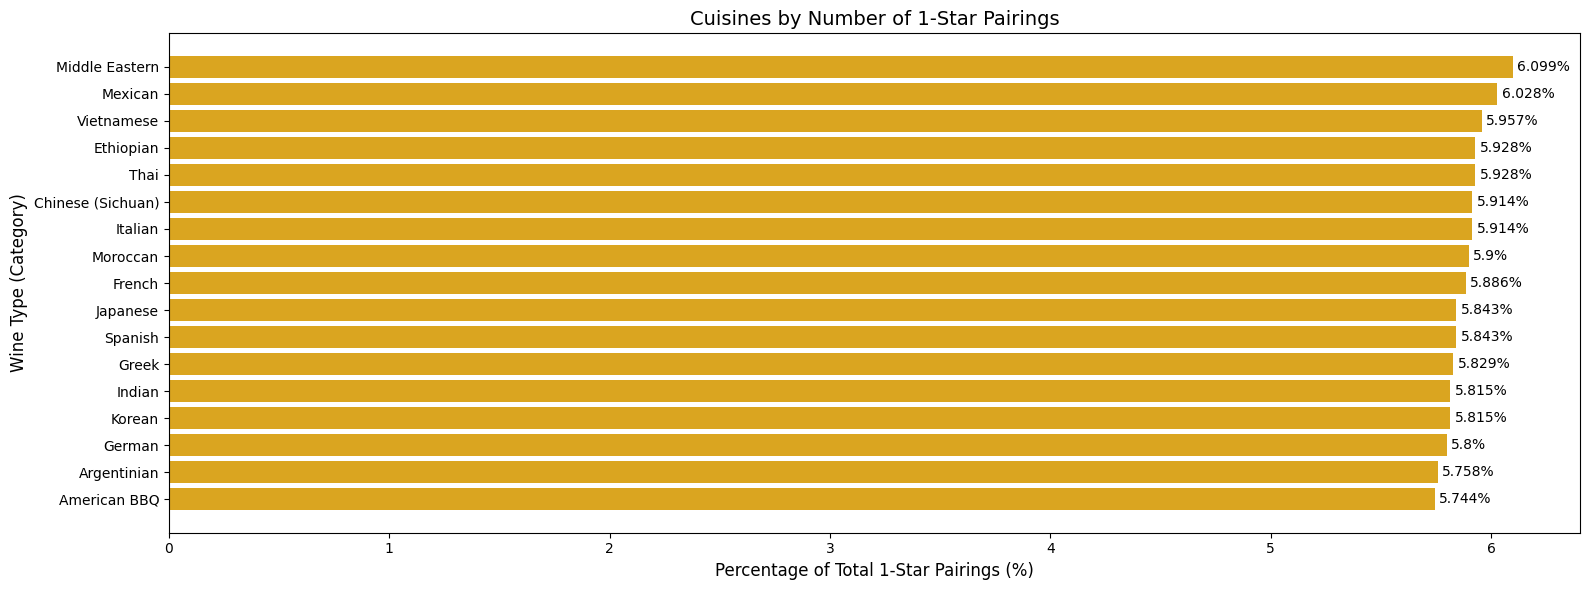

In [40]:
# Sort from highest to lowest percentage
pivot_cuisine_sorted = pivot_sorted.sort_values(by='pct_of_total_1', ascending=False)

# --- Visualization ---
plt.figure(figsize=(16, 6))
plt.barh(pivot_cuisine_sorted.index, pivot_cuisine_sorted['pct_of_total_1'], color='goldenrod')
plt.gca().invert_yaxis()  # Highest at top
plt.title('Cuisines by Number of 1-Star Pairings', fontsize=14)
plt.xlabel('Percentage of Total 1-Star Pairings (%)', fontsize=12)
plt.ylabel('Wine Type (Category)', fontsize=12)

# Add labels to bars
for i, v in enumerate(pivot_cuisine_sorted['pct_of_total_1']):
    plt.text(v + 0.02, i, f"{v}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

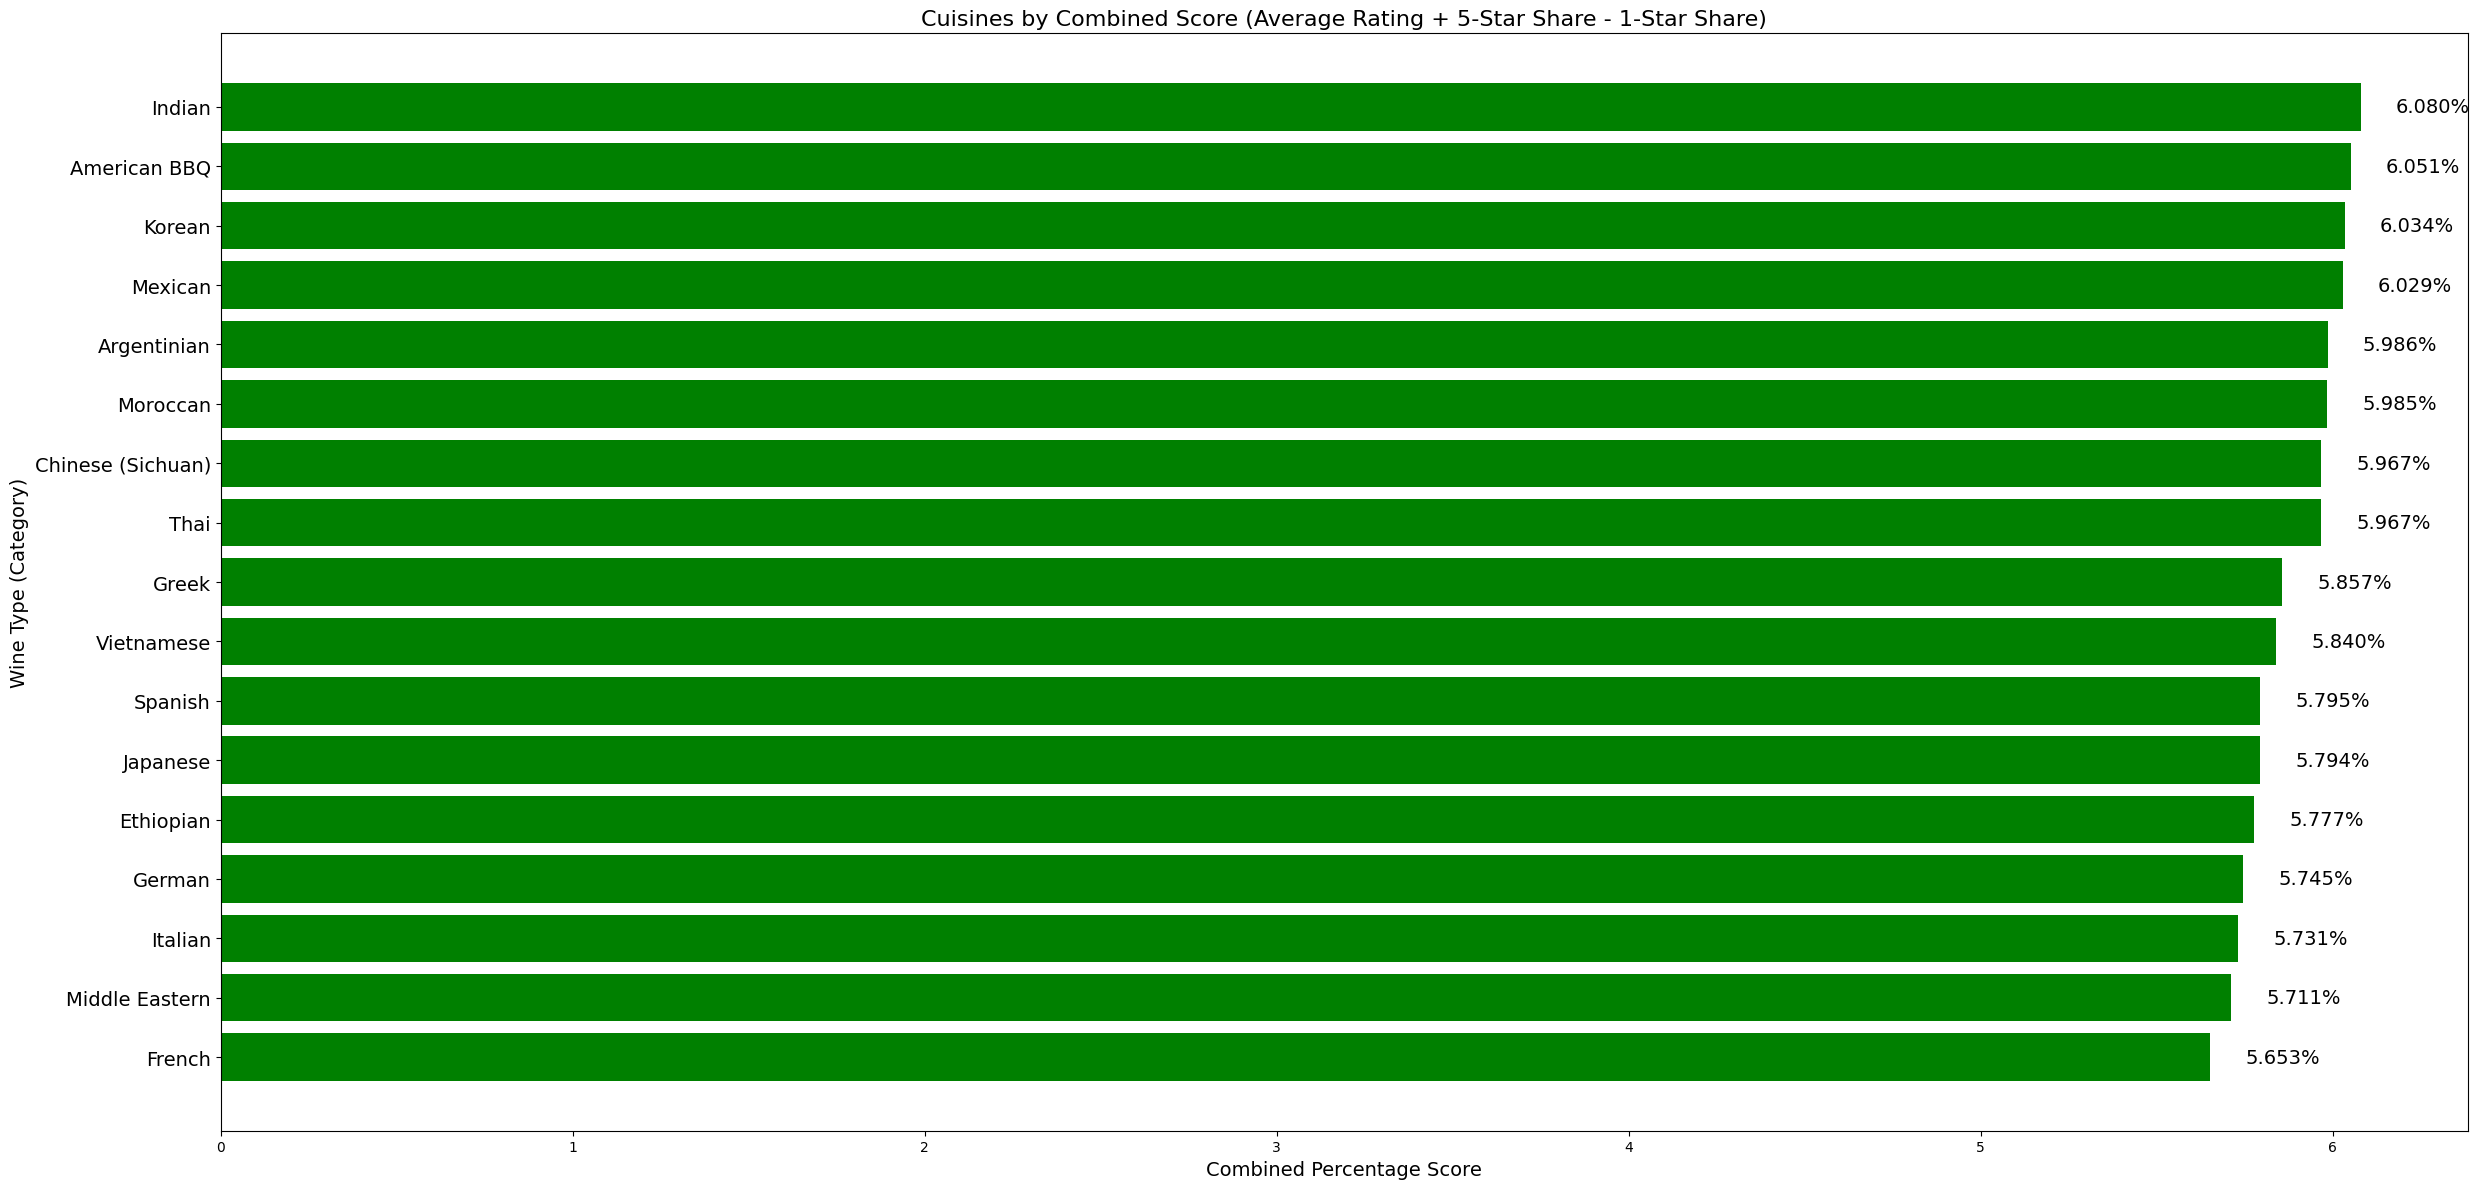

In [42]:
# Ensure both percentage columns exist in the same DataFrame

pivot_sorted['combined_score'] = pivot_sorted['pct_of_total_avg'] + pivot_sorted['pct_of_total_5'] - pivot_sorted['pct_of_total_1']

# Sort by combined score (descending)
pivot_cuisine_sorted = pivot_sorted.sort_values(by='combined_score', ascending=False)

# Visualization
plt.figure(figsize=(25, 12))
plt.barh(pivot_cuisine_sorted.index, pivot_cuisine_sorted['combined_score'], color='green')
plt.gca().invert_yaxis()  # Highest score on top

plt.title('Cuisines by Combined Score (Average Rating + 5-Star Share - 1-Star Share)', fontsize=16)
plt.xlabel('Combined Percentage Score', fontsize=14)
plt.ylabel('Wine Type (Category)', fontsize=14)

# Make wine names (y-axis labels) bigger
plt.yticks(fontsize=14)

# Add labels to bars
for i, v in enumerate(pivot_cuisine_sorted['combined_score']):
    plt.text(v + 0.1, i, f"{v:.3f}%", va='center', fontsize=14)

plt.tight_layout()
plt.show()